from https://www.kaggle.com/datasets/mazlumi/mbti-personality-type-twitter-dataset/code

## Part 1
Just set a baseline, we fit a model to our data.
But using standard local files

In [ ]:
#!pip install pandas

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('twitter_MBTI.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7811 entries, 0 to 7810
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7811 non-null   int64 
 1   text        7811 non-null   object
 2   label       7811 non-null   object
dtypes: int64(1), object(2)
memory usage: 183.2+ KB


(7811, 3)


<Axes: >

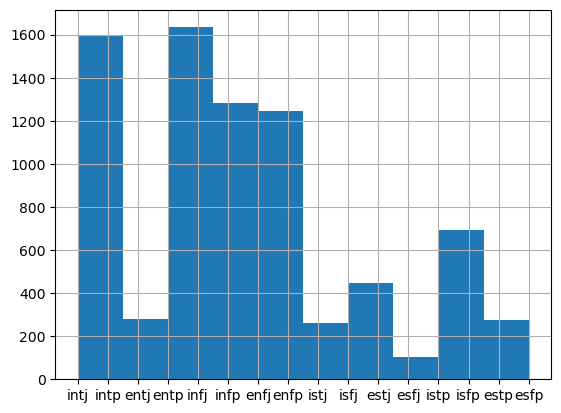

In [3]:
print(df.shape)
df.label.hist()

In [4]:
f = pd.Series(['m©ª«zy', '¤¥uw', 'ÆÇval 672'])
d= f.str.encode('ascii', 'ignore').str.decode('ascii')
print("After removing non-ascii:")
print(d)

After removing non-ascii:
0        mzy
1         uw
2    val 672
dtype: object


In [5]:
# nb each text contains multiple tweets seperated with ||| Was going to burst these, but don'tthink it adds value
# but definitely works removing @handles, and urls (probably)
import re
def rmhand(s):
    return re.sub('@[^\s]*','',s)
def rmurl(s):
    return re.sub('https://[^\s]*','',s)
def rmtags(s):
    return re.sub('#','',s)
def rmpipes(s):
    return re.sub('\|\|','',s)

def clean_tweets(s):  
    s=s.str.encode('ascii','ignore').str.decode('ascii')
    s=s.apply( rmhand )
    s=s.apply(rmurl)
    s=s.apply(rmtags)
    s=s.apply(rmpipes)
    s=s.apply(lambda x:x.lower())
    return s
test=pd.Series(['xxx @yz zzz','start https://spug end || more'])
clean_tweets(test)
df.text=clean_tweets(df.text)

['intj' 'intp' 'entj' 'entp' 'infj' 'infp' 'enfj' 'enfp' 'istj' 'isfj'
 'estj' 'esfj' 'istp' 'isfp' 'estp' 'esfp']
intj (81, 3)
intp (161, 3)
entj (241, 3)
entp (321, 3)
infj (401, 3)
infp (481, 3)
enfj (561, 3)
enfp (641, 3)
istj (721, 3)
isfj (801, 3)
estj (881, 3)
esfj (961, 3)
istp (1041, 3)
isfp (1121, 3)
estp (1201, 3)
esfp (1281, 3)


<Axes: >

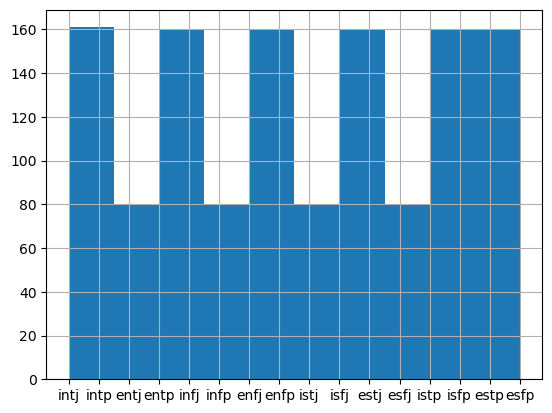

In [6]:
# get fully balanced sample
# firstly get labels
types=df.label.unique()
print(types)
# then get nsamp of each
nsamp=80
t='intj'
df.query('label=="'+t+'"')
working_df=df.head(1)
for t in types:    
    working_df=pd.concat([working_df,df.query('label=="'+t+'"').sample(nsamp)])
    print(t,working_df.shape)
# clean it
working_df.text=clean_tweets(working_df.text)
working_df.label.hist()  
    

In [7]:
working_df

,Unnamed: 0,text,label
0,0,"the pope is infallible, this is a catholic ...",intj
3513,3513,yeah| i don't know that far. i'm just trying ...,intj
7276,7276,he told a presumably overweight caller he coul...,intj
7327,7327,yes i overdo it with the emphasis on capital...,intj
7321,7321,hello im moving to sorry \n\ni moved to anoth...,intj
...,...,...,...
4788,4788,kadiri tlaga idk that releasing-tv-by-alphabe...,esfp
3150,3150,it finally hit me how unwell i've been since i...,esfp
943,943,dont remind meeejejjggjflfl| im putting it ou...,esfp
6784,6784,"do you use maybelline lol|i love saying ""girl...",esfp


In [8]:
# rescale with tf-idf
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(min_df=5, stop_words='english',ngram_range=(1,1),norm=None).fit(working_df.text)
X = vectorizer.transform(working_df.text)
y=working_df.label
# find maximum value for each of the features over dataset:
max_value = X.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(vectorizer.get_feature_names_out())
print(f'{len(feature_names)} features')
print("Features with lowest tfidf:\n{}".format(
      feature_names[sorted_by_tfidf[:20]]))

print("Features with highest tfidf: \n{}".format(
      feature_names[sorted_by_tfidf[-40:]]))

13082 features
Features with lowest tfidf:
['filled' 'lik' 'corner' 'constant' 'figured' 'rolling' 'stare' 'blow'
 'screams' 'assuming' 'annoy' 'defend' 'tests' 'prepared' 'ing' 'designed'
 'forgetting' 'wha' 'confusing' 'chemistry']
Features with highest tfidf: 
['11' 'checked' 'txt' 'comment' 'order' 'automatically' 'aespa'
 'tomorrow_x_together' 'soobin' 'list' 'pre' 'taehyun' 'lee' 'nct' 'saudi'
 '05' 'bobby' '09' '12' 'aye' '04' '17' 'selling' 'ka' '06' 'got7' 'track'
 '10' 'marketing' 'seventeen' 'focused' 'enhypen' 'sector' 'shopee' 'ikon'
 'sector17_d14' 'loveisland' '22' 'kst' '07']


In [9]:
from sklearn.model_selection import train_test_split
# setup for fitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
# vect = CountVectorizer().fit(text_train)
# X_train = vect.transform(text_train)
# print("X_train:\n{}".format(repr(X_train)))

In [11]:
# feature_names = vect.get_feature_names()
# print("Number of features: {}".format(len(feature_names)))
# print("First 20 features:\n{}".format(feature_names[:20]))
# print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
# print("Every 2000th feature:\n{}".format(feature_names[::2000]))

In [12]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier # 0.38
from sklearn.neighbors import KNeighborsClassifier # brutal
from sklearn.neural_network import MLPClassifier # poor 0.12
from sklearn.ensemble import RandomForestClassifier # 0.4
from sklearn.metrics import classification_report
#scores = cross_val_score(LogisticRegression(max_iter=500), X_train, y_train, cv=2)
#print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))
reg=RandomForestClassifier().fit(X_train, y_train)
y_pred=reg.predict(X_test)
print(classification_report(y_pred,y_test,target_names=types))

              precision    recall  f1-score   support

        intj       0.29      0.36      0.32        22
        intp       0.45      0.54      0.49        28
        entj       0.35      0.33      0.34        24
        entp       0.50      0.76      0.60        21
        infj       0.36      0.18      0.24        44
        infp       0.32      0.24      0.27        29
        enfj       0.39      0.53      0.45        17
        enfp       0.38      0.47      0.42        19
        istj       0.30      0.45      0.36        20
        isfj       0.43      0.52      0.47        23
        estj       0.43      0.26      0.33        38
        esfj       0.46      0.44      0.45        25
        istp       0.29      0.25      0.27        28
        isfp       0.56      0.39      0.46        38
        estp       0.28      0.53      0.36        15
        esfp       0.58      0.56      0.57        32

    accuracy                           0.40       423
   macro avg       0.40   

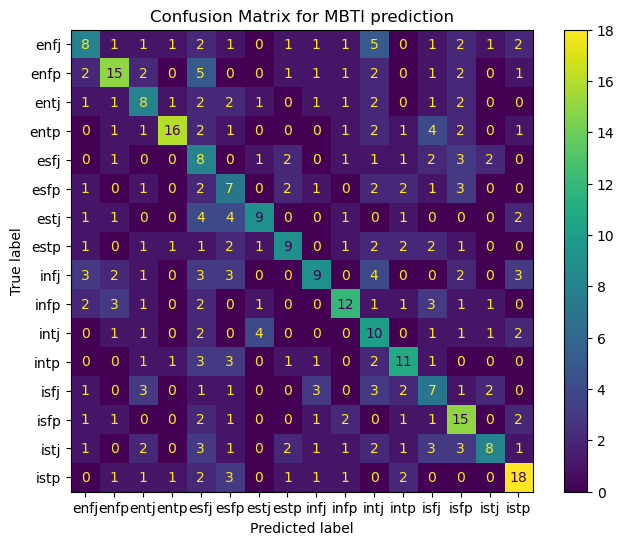

In [13]:
from sklearn.metrics import confusion_matrix

# Order of the input parameters is important: 
# first param is the actual output values
# second param is what our model predicted
conf_matrix = confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(conf_matrix, display_labels=reg.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for MBTI prediction')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax);

## Part Two   
Now do likewise, with same data.  But as if it has come from Big Data

In [14]:
#!pip install happybase

In [102]:
import happybase

connection = happybase.Connection('localhost')
table = connection.table('wordcount')

In [103]:
table.row(b'1')

{b'cf:count': b'51',
 b'cf:doc_id': b'000000000',
 b'cf:label': b'intj',
 b'cf:word': b'a'}

In [104]:
rows = table.scan()

In [105]:
# furthermore
data = [row[1] for row in rows]     

In [106]:
hdf = pd.DataFrame(data)

In [107]:
hdf.shape

(3470604, 4)

In [108]:
hdf.head()

,b'cf:count',b'cf:doc_id',b'cf:label',b'cf:word'
0,b'51',b'000000000',b'intj',b'a'
1,b'1',b'000000000',b'intj',b'adoration'
2,b'8',b'000000000',b'intj',b'church'
3,b'1',b'000000000',b'intj',b'bien'
4,b'1',b'000000002',b'intj',b'awful'


In [109]:
# rename columns and reassign data from binary 
hdf.rename(columns={b'cf:doc_id':'doc_id',b'cf:count':'ccount',b'cf:label':'label',b'cf:word':'word'},inplace=True)

In [110]:
hdf.ccount=hdf.ccount.astype(int)
hdf.label=hdf.label.astype(str)
hdf.word=hdf.word.astype(str)
hdf.doc_id=hdf.doc_id.astype(str)

In [111]:
hdf

,ccount,doc_id,label,word
0,51,000000000,intj,a
1,1,000000000,intj,adoration
2,8,000000000,intj,church
3,1,000000000,intj,bien
4,1,000000002,intj,awful
...,...,...,...,...
3470599,1,000000221,intp,experiencing
3470600,2,000000221,intp,eye
3470601,1,000000221,intp,face
3470602,1,000000221,intp,false


In [116]:
# make it tiny, to develop
smallhdf=hdf[:50000]

In [117]:
print(f'{len(smallhdf.doc_id.unique())} docs, {len(smallhdf.label.unique())} classes')

15 docs, 12 classes


In [119]:
# we have individual document frequency, now generate total frequency
words_df=pd.DataFrame(data=smallhdf.word.unique(),columns=['word'])

In [120]:
word_dict=dict.fromkeys(smallhdf.word.unique(),0)
for w in word_dict.keys():
    #word_dict[w]=hdf.query('word==@w').ccount.sum()
    # going to hope this is quicker
    word_dict[w]=smallhdf[smallhdf.word==w].ccount.sum()

In [ ]:
import pickle
print(word_dict['the'])
with open('word_dict.pickle', 'wb') as f:
    pickle.dump(word_dict, f, protocol=pickle.HIGHEST_PROTOCOL)

with open('word_dict.pickle', 'rb') as f:
    w2 = pickle.load(f)
print(w2['the'])

from TfdIdVectorizer:    
The formula that is used to compute the tf-idf for a term t of a document d in a document set is tf-idf(t, d) = tf(t, d) * idf(t), and the idf is computed as idf(t) = log [ n / df(t) ] + 1 (if smooth_idf=False), where n is the total number of documents in the document set and df(t) is the document frequency of t; the document frequency is the number of documents in the document set that contain the term t. The effect of adding “1” to the idf in the equation above is that terms with zero idf, i.e., terms that occur in all documents in a training set, will not be entirely ignored. (Note that the idf formula above differs from the standard textbook notation that defines the idf as idf(t) = log [ n / (df(t) + 1) ]).

In [122]:
# tf/idf from https://monkeylearn.com/blog/what-is-tf-idf
import numpy as np
from collections import OrderedDict
import math
od=OrderedDict(word_dict)
from scipy.sparse import csr_matrix  # use lil instead?
from scipy.sparse import lil_matrix
x=len(smallhdf.doc_id.unique())
y=len(od)
HX = csr_matrix((x,y))
Hy=[]
# how many token instances in totallity? 
total_tokens=sum(od.values())
i=0
docs=smallhdf.groupby(['doc_id'])[['label','word','ccount']]
for doc,frame in docs:
    Hy+=[frame.iloc[0].label]
    #print(f'|{frame.iloc[0].label}|')
    doctot=frame.ccount.sum()  # shudder to think of inefficency of doing this
    for index,row in frame.iterrows():
        # destination in sparse
        j=list(od.keys()).index(row.word)
        # document frequency
        tf=math.log(1+ od[row.word] / total_tokens)
        idf=row.ccount
        #print(f'[{i},{j}]')
        HX[i,j]=tf*idf
    i=i+1

/home/hduser/anaconda3/lib/python3.10/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [123]:
HX,Hy

(<15x12790 sparse matrix of type '<class 'numpy.float64'>'
 	with 28694 stored elements in Compressed Sparse Row format>,
 ['intj',
  'intj',
  'isfj',
  'isfj',
  'isfj',
  'intp',
  'isfp',
  'intj',
  'infj',
  'infp',
  'isfj',
  'infj',
  'intj',
  'intp',
  'infp'])

In [124]:
X,y

(<1281x13082 sparse matrix of type '<class 'numpy.float64'>'
 	with 450912 stored elements in Compressed Sparse Row format>,
 12790)

In [125]:
# fit something
X_train, X_test, y_train, y_test = train_test_split(HX, Hy, test_size=0.33, random_state=42)
reg=RandomForestClassifier().fit(X_train, y_train)
y_pred=reg.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

        infj       0.00      0.00      0.00       0.0
        infp       0.00      0.00      0.00       0.0
        intj       0.00      0.00      0.00       3.0
        intp       0.00      0.00      0.00       0.0
        isfj       0.00      0.00      0.00       2.0

    accuracy                           0.00       5.0
   macro avg       0.00      0.00      0.00       5.0
weighted avg       0.00      0.00      0.00       5.0



/home/hduser/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hduser/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hduser/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hduser/anaconda3/lib/python3.1

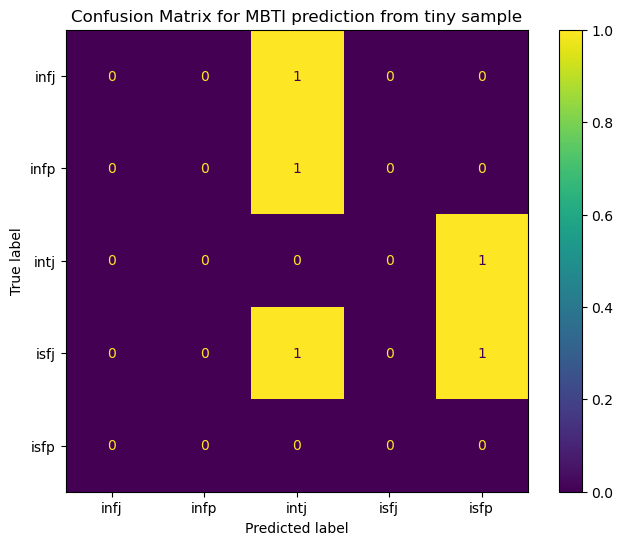

In [126]:
# and dare we? see what it looks like for such a small set?
conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
display = ConfusionMatrixDisplay(conf_matrix, display_labels=reg.classes_)
# set the plot title using the axes object
ax.set(title='Confusion Matrix for MBTI prediction from tiny sample')
# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax);